# Packages and Data Imports

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

train_full= pd.read_csv('train.csv',index_col='PassengerId')

quantitative = [f for f in train_full.columns if train_full.dtypes[f] != 'object']
quantitative.remove('Survived')#Survived is target label
qualitative = [f for f in train_full.columns if train_full.dtypes[f] == 'object']

# 1. Exploratory Data Analysis

In [5]:
train_full.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## 1.1 Preamble

There are a few things we expect from the data. For example, we know that higher class tickets were sorted to higher level decks, with easier access to life boats, therefore we expect first class to be a relevant feature to assess survival chance. Then, we expect children and women to take priority, as it is customary in popular culture that "women and children first" in emergency cases. This also means that there should some level of relation between survival chance and number of family members on board, as families would have taken prioriy in principal. Obviously, these are subjective expectations, and we will see if they hold.

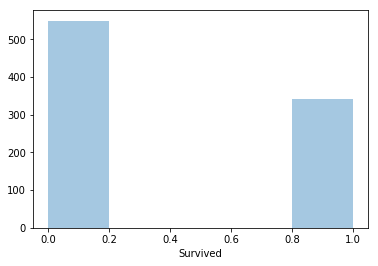

In [9]:
sns.distplot(train_full['Survived'],kde=False)

In [10]:
train_full['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

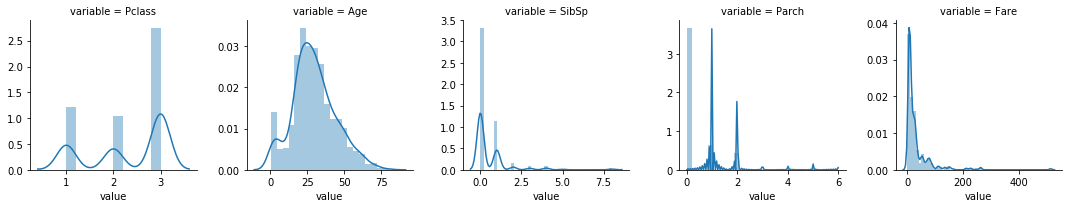

In [13]:
f = pd.melt(train_full, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

## 1.2 Target Class Analysis

We want to see how the target label/class is influenced by the features

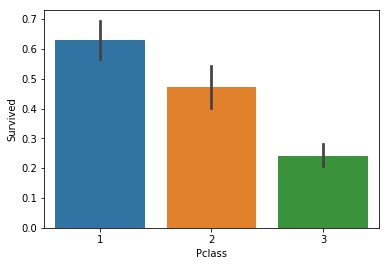

In [16]:
sns.barplot(y='Survived',x='Pclass',data=train_full)

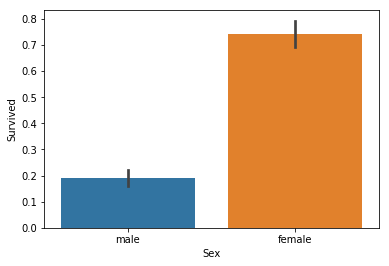

In [17]:
sns.barplot(y='Survived',x='Sex',data=train_full)

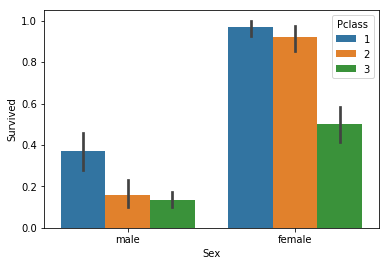

In [28]:
sns.barplot(y='Survived',x='Sex',hue='Pclass',data=train_full)

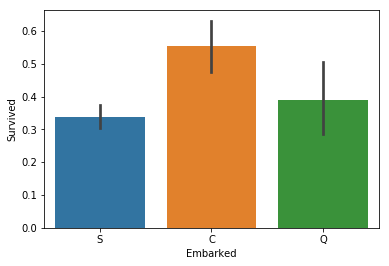

In [18]:
sns.barplot(y='Survived',x='Embarked',data=train_full)

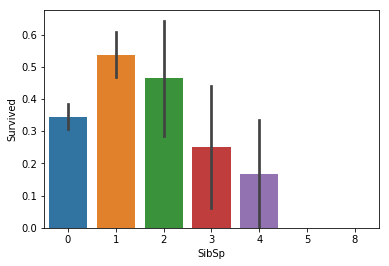

In [19]:
sns.barplot(y='Survived',x='SibSp',data=train_full)

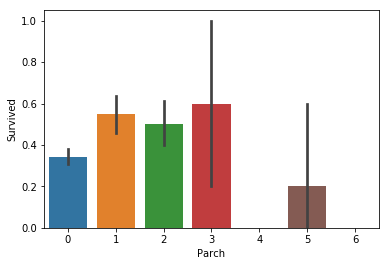

In [20]:
sns.barplot(y='Survived',x='Parch',data=train_full)

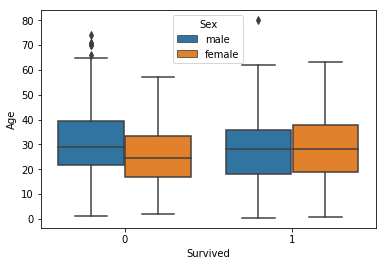

In [26]:
sns.boxplot(x='Survived',y='Age',hue='Sex',data=train_full)

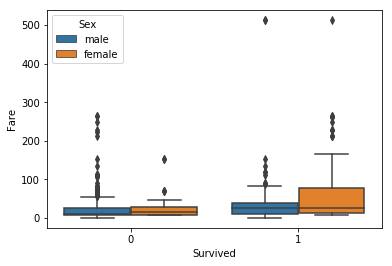

In [27]:
sns.boxplot(x='Survived',y='Fare',hue='Sex',data=train_full)

From the above we can outline some trends on the segments more likely to survive:
* First Class
* Women
* Age mostly similar, with a slight shift to younger people being more likely to have survived
* In proportion, people embarking in S were more likely to not have survived
* Higher fares
* In  proportion, people with family members seemd to have been more likely to have survived


With the above plot we confirm some of the previous points. Namely, First class males were at least twice as likely to have survived in comparisson with other classes, but women in second class enjoied a greater change of survivel. We also note that thrid class women were more likely to have survived than first class man.

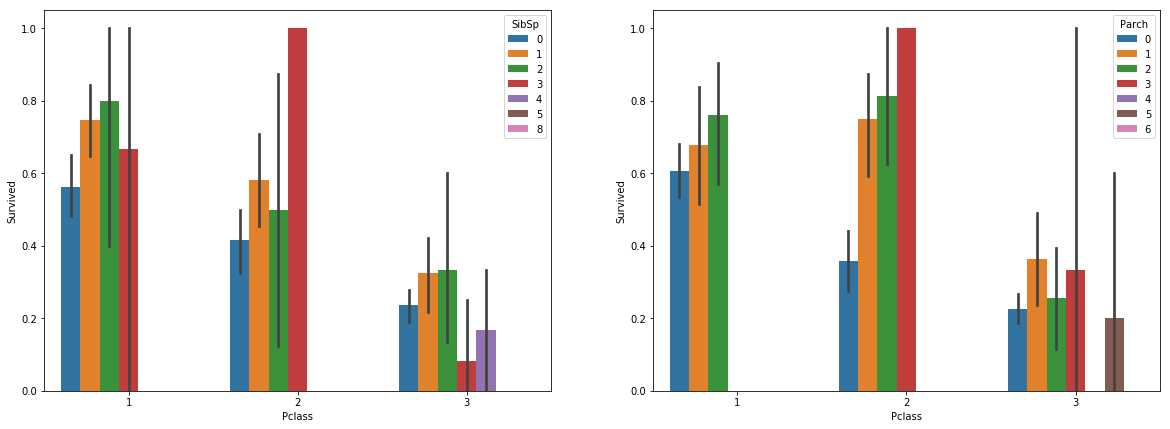

In [29]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
sns.barplot(x="Pclass", y="Survived", hue="SibSp", data=train_full)
plt.subplot(1,2,2)
sns.barplot(x="Pclass", y="Survived", hue="Parch", data=train_full)

The two plots above show yet another tendency, which was to favour people with family on board . Notice that for each class, the chance of being saved if having family on board is greater than without.This might indicate that surnames might be relevant!

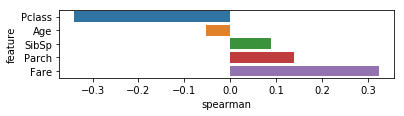

In [30]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['Survived'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative
spearman(train_full, features)

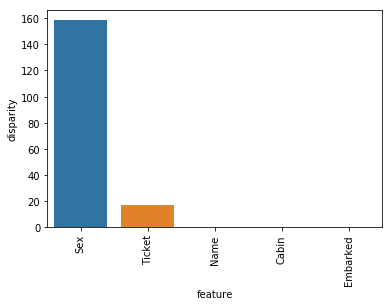

In [31]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():#for each level of the category c
            s = frame[frame[c] == cls]['Survived'].values
            samples.append(s)#Get all the values of SalePrice for the level cls of the categorical variable c, and append
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train_full)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

## 1.3 Feature Relations Analysis

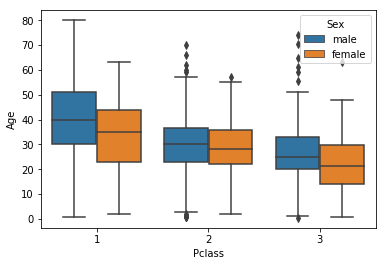

In [34]:
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=train_full)

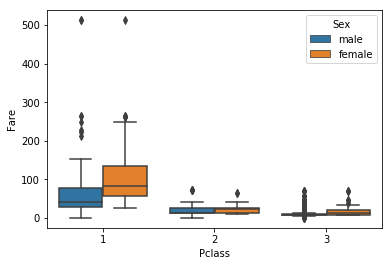

In [36]:
sns.boxplot(x='Pclass',y='Fare',hue='Sex',data=train_full)

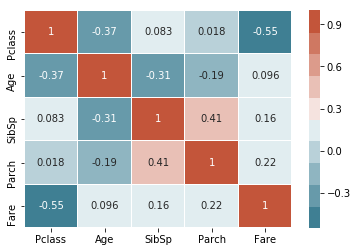

In [38]:
sns.heatmap(train_full.drop('Survived',axis=1).corr(),cmap=sns.diverging_palette(220, 20, n=10),annot=True,linewidths=0.1)

Some variables are fairly correlated:
* SibSp with Parch, possibly indicating presence of families.
* Pclass and Fare (negative), indicating first class was more expensive, as expected
* Age (negatively) correlated with Pclass (older people tended to be in first class), SibSp and Parch, meaning the older people seemed to not being with their families